In [1]:
using MarkovRandomFields, MarkovRandomFields.Models,
    MarkovRandomFields.MCMC
using Graphs, IndexedFactorGraphs
using Statistics

In [2]:
L = 10
J = 1.0
h = zeros(L^2)
β = 1.0;

In [27]:
#    using MCMCChains
#    nsamples = 10^5
# num_warmup = 10^2
#     A = adjacency_matrix(grid((L,L); periodic=true))
#     model = MarkovRandomField(Ising(J*A, h, β))
#     nchains = Base.Threads.nthreads()
#     samples_bundle = sample(MRFModel(model), MHSampler(), MCMCThreads(), 
#         nsamples, nchains; num_warmup)
#     chains = Chains(permutedims(stack(stack.(samples_bundle)), (2,1,3)))

In [9]:
function estimate_magnetization(L, β, nsamples, n_warmup)
    A = adjacency_matrix(grid((L,L); periodic=true))
    model = MarkovRandomField(Ising(J*A, h, β))
    nchains = 10*Base.Threads.nthreads()
    samples_bundle = sample(MRFModel(model), MHSampler(model), MultiThread(), 
        nsamples, nchains; n_warmup)
    spin = MarkovRandomFields.Models.potts2spin
    avg_magnetiz = mean(abs, mean.(spin, mean.(samples_bundle)))
    return avg_magnetiz
end

estimate_magnetization (generic function with 1 method)

In [10]:
nsamples = 10^3
n_warmup = 10^2
βs = 0.2:0.05:0.8
ms = [estimate_magnetization(L, β, nsamples, n_warmup)
        for β in βs];

nchunks = 8
nchunks = 8
nchunks = 8
nchunks = 8
nchunks = 8
nchunks = 8
nchunks = 8
nchunks = 8
nchunks = 8
nchunks = 8
nchunks = 8
nchunks = 8
nchunks = 8


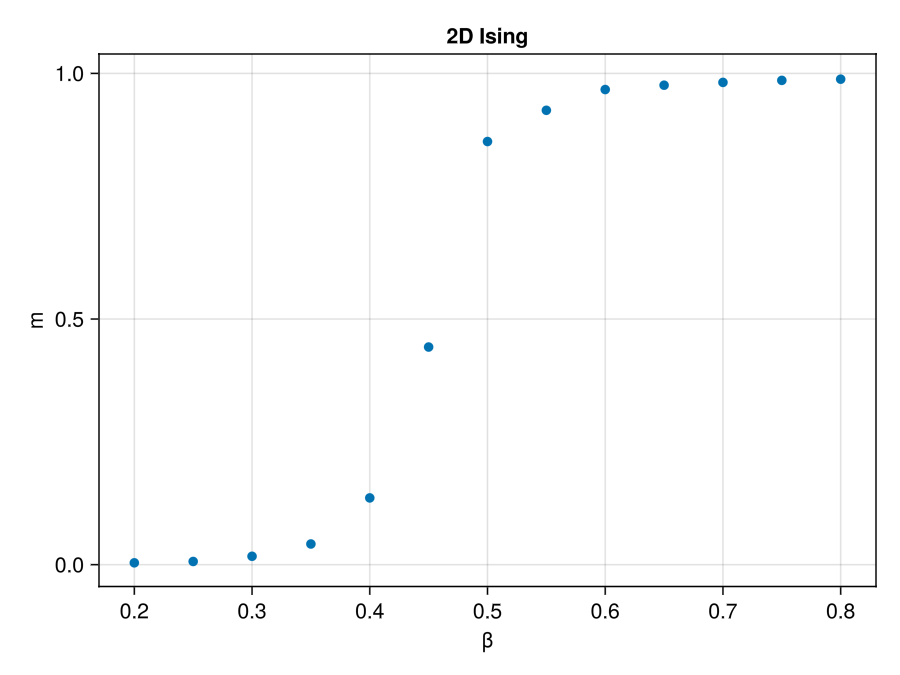

In [11]:
using GLMakie
GLMakie.activate!(inline=true)

f = Figure()
ax = Axis(f[1, 1],
    title = "2D Ising", xlabel="β", ylabel="m")
scatter!(ax, βs, ms)
f